# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
%load_ext autoreload
%autoreload 2

In [16]:
import os
os.chdir('/content/drive/MyDrive/2023-Berezin-TimeSeriesCourse-main/practice/05 Snippets')

Импорт библиотек и модулей

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets_v2 import *
from scipy import signal

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

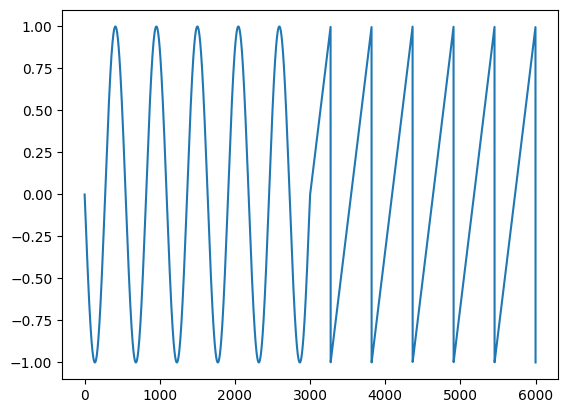

In [18]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [20]:
len(ts)

6000

In [ ]:
#Поиск сниппетов
from modules.snippets_v2 import snippets
snp = snippets(ts, 600, 2)

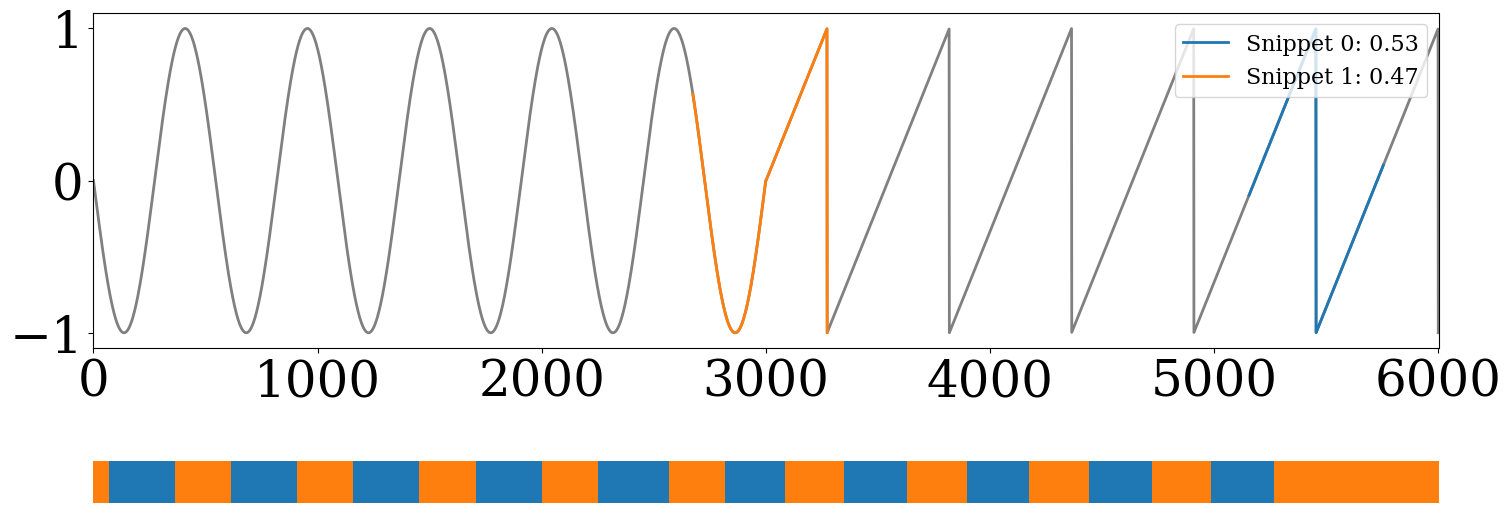

<Axes: >

In [ ]:
from modules.snippets_v2 import plot_snippets
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «X» (угол крена) на временном интервале от 950 сек. до 109 сек.** из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из модуля snippets.py.

In [21]:
import pandas as pd
file_path = "/content/drive/MyDrive/2023-Berezin-TimeSeriesCourse-main/practice/05 Snippets/datasets_PAMAP/PAMAP.txt"

df = pd.read_csv(file_path, sep=' ', header=None)

In [22]:
df_transposed = df.transpose()
column_names = [
    "timestamp (s)",
    "activityID",
    "heart rate (bpm)",
    "temperature (°C)",
    "acc_x1 (ms-2)",
    "acc_y1 (ms-2)",
    "acc_z1 (ms-2)",
    "acc_x2 (ms-2)",
    "acc_y2 (ms-2)",
    "acc_z2 (ms-2)",
    "gyro_x (rad/s)",
    "gyro_y (rad/s)",
    "gyro_z (rad/s)",
    "mag_x (μT)",
    "mag_y (μT)",
    "mag_z (μT)",
    "orientation1",
    "orientation2",
    "orientation3",
]
for i in range(len(column_names)):
    df_transposed.rename(columns={i: column_names[i]}, inplace=True)

In [23]:
df_transposed

,timestamp (s),activityID,heart rate (bpm),temperature (°C),acc_x1 (ms-2),acc_y1 (ms-2),acc_z1 (ms-2),acc_x2 (ms-2),acc_y2 (ms-2),acc_z2 (ms-2),gyro_x (rad/s),gyro_y (rad/s),gyro_z (rad/s),mag_x (μT),mag_y (μT),mag_z (μT),orientation1,orientation2,orientation3,19
0,505.71,2.0,NaN,35.0625,0.497271,9.08249,-1.875540,0.319610,9.10631,-1.642520,-0.064955,0.033557,0.051343,2.52139,-23.9094,3.66977,0.636708,-0.766698,0.073248,0.037565
1,505.72,2.0,NaN,35.0625,0.693164,8.93258,-1.677900,0.379878,8.90965,-1.416770,0.063998,0.052043,0.078401,2.12795,-23.8953,4.08997,0.636387,-0.766974,0.073379,0.037113
2,505.73,2.0,79.0,35.0625,0.929013,9.04638,-1.441670,0.606483,8.89380,-1.236830,0.192540,0.034474,0.070010,1.87388,-24.2730,4.23135,0.635648,-0.767586,0.073587,0.036706
3,505.74,2.0,NaN,35.0625,1.039680,9.38386,-1.595650,0.772609,8.99907,-1.237530,0.282665,0.053817,0.057465,1.73597,-23.3649,3.94322,0.635121,-0.768060,0.073553,0.035983
4,505.75,2.0,NaN,35.0625,1.070930,9.38219,-1.827400,0.938327,9.21025,-1.419260,0.335187,0.016476,0.011713,2.25530,-24.4165,4.65783,0.633378,-0.769606,0.072906,0.034988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145995,2305.66,4.0,NaN,35.6875,2.140840,7.09274,-0.213018,2.107840,7.31908,-0.041456,0.256645,-0.568124,0.005918,-12.27830,-50.9797,20.50000,0.566790,-0.673692,-0.347012,-0.323220
145996,2305.67,4.0,NaN,35.6875,2.027390,6.56647,-0.135921,2.015190,6.94196,-0.041992,0.221546,-0.501649,0.103945,-12.52640,-51.7445,20.64360,0.566736,-0.675315,-0.345593,-0.321443
145997,2305.68,4.0,NaN,35.6875,1.978930,6.11268,-0.445092,1.861420,6.39894,-0.027528,0.162119,-0.355711,0.133332,-11.76720,-51.6443,21.35340,0.566580,-0.676581,-0.344391,-0.320344
145998,2305.69,4.0,NaN,35.6875,1.677590,5.73813,-0.294450,1.707950,5.96165,-0.073210,0.122680,-0.262807,0.188172,-12.41520,-51.3625,21.34730,0.566308,-0.677672,-0.343209,-0.319786


In [24]:
start_time = 109
end_time = 950

filtered_df = df_transposed[(df_transposed["timestamp (s)"] >= start_time) & (df_transposed["timestamp (s)"] <= end_time)]

gyro_x_data = filtered_df["gyro_x (rad/s)"].to_numpy()

In [29]:
new_ts = gyro_x_data[:10000] # для примера оставил только 10к элементов из 44к

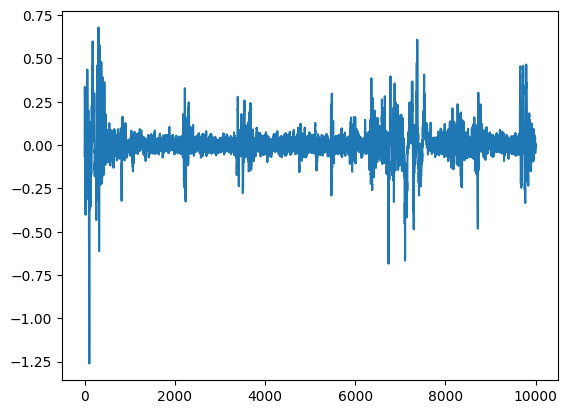

In [30]:
plt.plot(new_ts)

In [32]:
snp = snippets(new_ts, 1000, 5)

Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

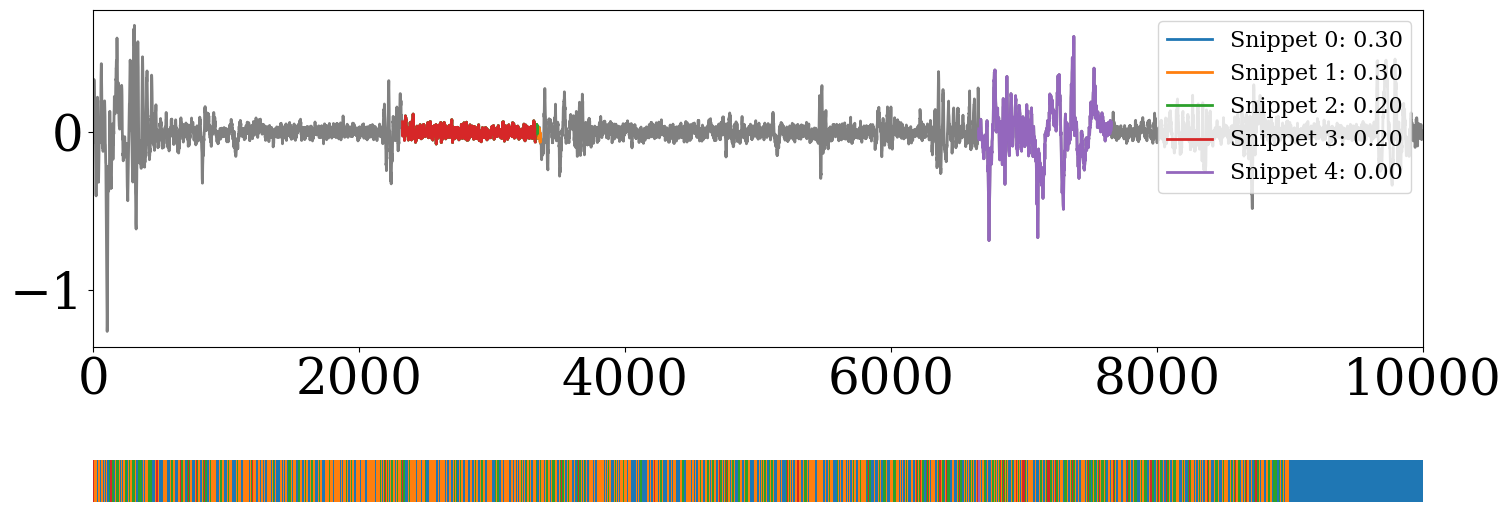

<Axes: >

In [33]:
plot_snippets(new_ts, snp)

Оцените точность разметки, полученной при помощи сниппетов.

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_scores = []
for i in range(5):
  snippet = snp[i]
  snippet_values = np.array(snippet['snippet'])

  snippet_values = np.resize(snippet_values, new_ts.shape)
  mse = np.mean((new_ts - snippet_values) ** 2)
  mse_scores.append(mse)

print("MSE Scores for Snippets:")
for i, mse in enumerate(mse_scores):
    print(f"Snippet {i}: {mse * 100:.2f}%")

MSE Scores for Snippets:
Snippet 0: 1.12%
Snippet 1: 1.13%
Snippet 2: 1.12%
Snippet 3: 1.10%
Snippet 4: 3.90%


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

 **MSE представляет собой среднеквадратичное отклонение между исходным временным рядом и сниппетами. Чем ближе значение MSE к нулю, тем более точно сниппет отражает исходный временной ряд.**

 **Результаты показывают, что первые четыре сниппета имеют более низкое MSE, что указывает на их близкое сходство с исходным временным рядом. Пятый сниппет имеет более высокое значение MSE, что может указывать на менее точное представление.**

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1.

In [50]:
df_transposed

,timestamp (s),activityID,heart rate (bpm),temperature (°C),acc_x1 (ms-2),acc_y1 (ms-2),acc_z1 (ms-2),acc_x2 (ms-2),acc_y2 (ms-2),acc_z2 (ms-2),gyro_x (rad/s),gyro_y (rad/s),gyro_z (rad/s),mag_x (μT),mag_y (μT),mag_z (μT),orientation1,orientation2,orientation3,19
0,505.71,2.0,NaN,35.0625,0.497271,9.08249,-1.875540,0.319610,9.10631,-1.642520,-0.064955,0.033557,0.051343,2.52139,-23.9094,3.66977,0.636708,-0.766698,0.073248,0.037565
1,505.72,2.0,NaN,35.0625,0.693164,8.93258,-1.677900,0.379878,8.90965,-1.416770,0.063998,0.052043,0.078401,2.12795,-23.8953,4.08997,0.636387,-0.766974,0.073379,0.037113
2,505.73,2.0,79.0,35.0625,0.929013,9.04638,-1.441670,0.606483,8.89380,-1.236830,0.192540,0.034474,0.070010,1.87388,-24.2730,4.23135,0.635648,-0.767586,0.073587,0.036706
3,505.74,2.0,NaN,35.0625,1.039680,9.38386,-1.595650,0.772609,8.99907,-1.237530,0.282665,0.053817,0.057465,1.73597,-23.3649,3.94322,0.635121,-0.768060,0.073553,0.035983
4,505.75,2.0,NaN,35.0625,1.070930,9.38219,-1.827400,0.938327,9.21025,-1.419260,0.335187,0.016476,0.011713,2.25530,-24.4165,4.65783,0.633378,-0.769606,0.072906,0.034988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145995,2305.66,4.0,NaN,35.6875,2.140840,7.09274,-0.213018,2.107840,7.31908,-0.041456,0.256645,-0.568124,0.005918,-12.27830,-50.9797,20.50000,0.566790,-0.673692,-0.347012,-0.323220
145996,2305.67,4.0,NaN,35.6875,2.027390,6.56647,-0.135921,2.015190,6.94196,-0.041992,0.221546,-0.501649,0.103945,-12.52640,-51.7445,20.64360,0.566736,-0.675315,-0.345593,-0.321443
145997,2305.68,4.0,NaN,35.6875,1.978930,6.11268,-0.445092,1.861420,6.39894,-0.027528,0.162119,-0.355711,0.133332,-11.76720,-51.6443,21.35340,0.566580,-0.676581,-0.344391,-0.320344
145998,2305.69,4.0,NaN,35.6875,1.677590,5.73813,-0.294450,1.707950,5.96165,-0.073210,0.122680,-0.262807,0.188172,-12.41520,-51.3625,21.34730,0.566308,-0.677672,-0.343209,-0.319786


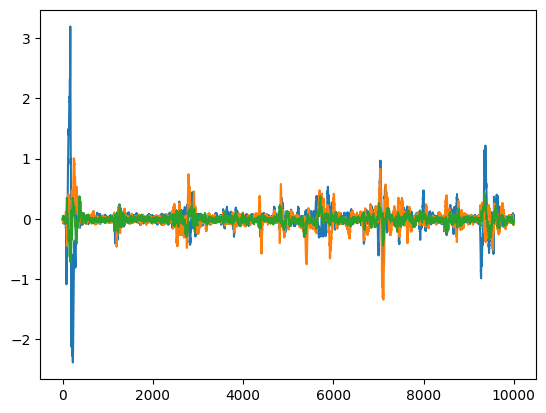

In [57]:
gyro_x = filtered_df["gyro_x (rad/s)"].to_numpy()
gyro_y = filtered_df["gyro_y (rad/s)"].to_numpy()
gyro_z = filtered_df["gyro_z (rad/s)"].to_numpy()

gyro_data = np.vstack((gyro_x, gyro_y, gyro_z)).T

new_ts = gyro_data[10000:20000]

plt.plot(new_ts)

In [ ]:
snp = snippets(new_ts, 1000, 3)

In [ ]:
plot_snippets(new_ts, snp)

Оцените точность разметки, полученной при помощи сниппетов.

In [ ]:
mse_scores = []
for i in range(3):
  snippet = snp[i]
  snippet_values = np.array(snippet['snippet'])
  snippet_values = np.resize(snippet_values, new_ts.shape)
  mse = np.mean((new_ts - snippet_values) ** 2)
  mse_scores.append(mse)

print("MSE Scores for Snippets:")
for i, mse in enumerate(mse_scores):
    print(f"Snippet {i}: {mse * 100:.2f}%")

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

In [ ]:
# INSERT YOUR CODE

Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

In [ ]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?